## The big problem with dataset is that all Columns is stored in the "object" format and must be converted to the "float64" format. This will take a lot of time and effort

# Questions

• What is the most expensive app on the store.

• Which Genre has more apps.

• What is the average size of the free apps & paid apps.

• What is the 5 top rated apps.

• How many apps that has more than 50K reviews.

• What is the average price of the apps for each genre with each installs numbers.

• How many apps have rating > 4.7 and what is thier avg price.

• How much google earned from the 5,000,000+ installed apps

• What is the max and min size for free and paid apps.

• is there a correlation between rating, Reviews, Size with the price of the app

• How many apps for each type for each content reading.

• How many apps that can work on android version 4.2

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
df = pd.read_csv('/Users/youssefadel/Desktop/googleplaystore.csv')

In [128]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [130]:
for Reviews in df['Reviews'].unique():
    print(Reviews)

159
967
87510
215644
167
178
36815
13791
121
13880
8788
44829
4326
1518
55
3632
27
194216
224399
450
654
7699
61
118
192
20260
203
136
223
1120
227
5035
1015
353
564
8145
36639
158
591
117
176
295221
2206
26
174531
1070
85
845
367
1598
284
17057
129
542
10479
805
1403
3971
534
7774
38846
2431
6090
295
190
40211
356
52530
116986
1379
271920
736
7021
197
737
3574
994
197136
142
15168
2155
138
5414
21777
348
250
13372
7880
3617
4806
65786
31433
5097
1754
2680
1288
18900
49790
1150
1739
32090
2225
4369
8572
964
42050
104
17934
601
36
187
182
30
134
74
113715
3595
9315
75
38
26834
119
2277
2280
184
9
77
35
364
18
473
66
3871
257
62
2914724
1857
4478
577550
814080
246315
454060
155446
418
22486
203130
1435
116507
1433233
90468
860
363934
87873
17506
1862
2084
47303
19080
161
85842
7831
91615
4620
21336
26875
1778
2709
64513
8342
527
1322
1680
2739
1065
233757
2
51269
30105
156
114
341157
16129
674730
1254730
85185
32584
217730
70991
1002861
16589
148945
4458
62272
8941
46353
1279184
88073
67

In [131]:
df['Reviews'] = pd.to_numeric(df['Reviews'] , errors='coerce')


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


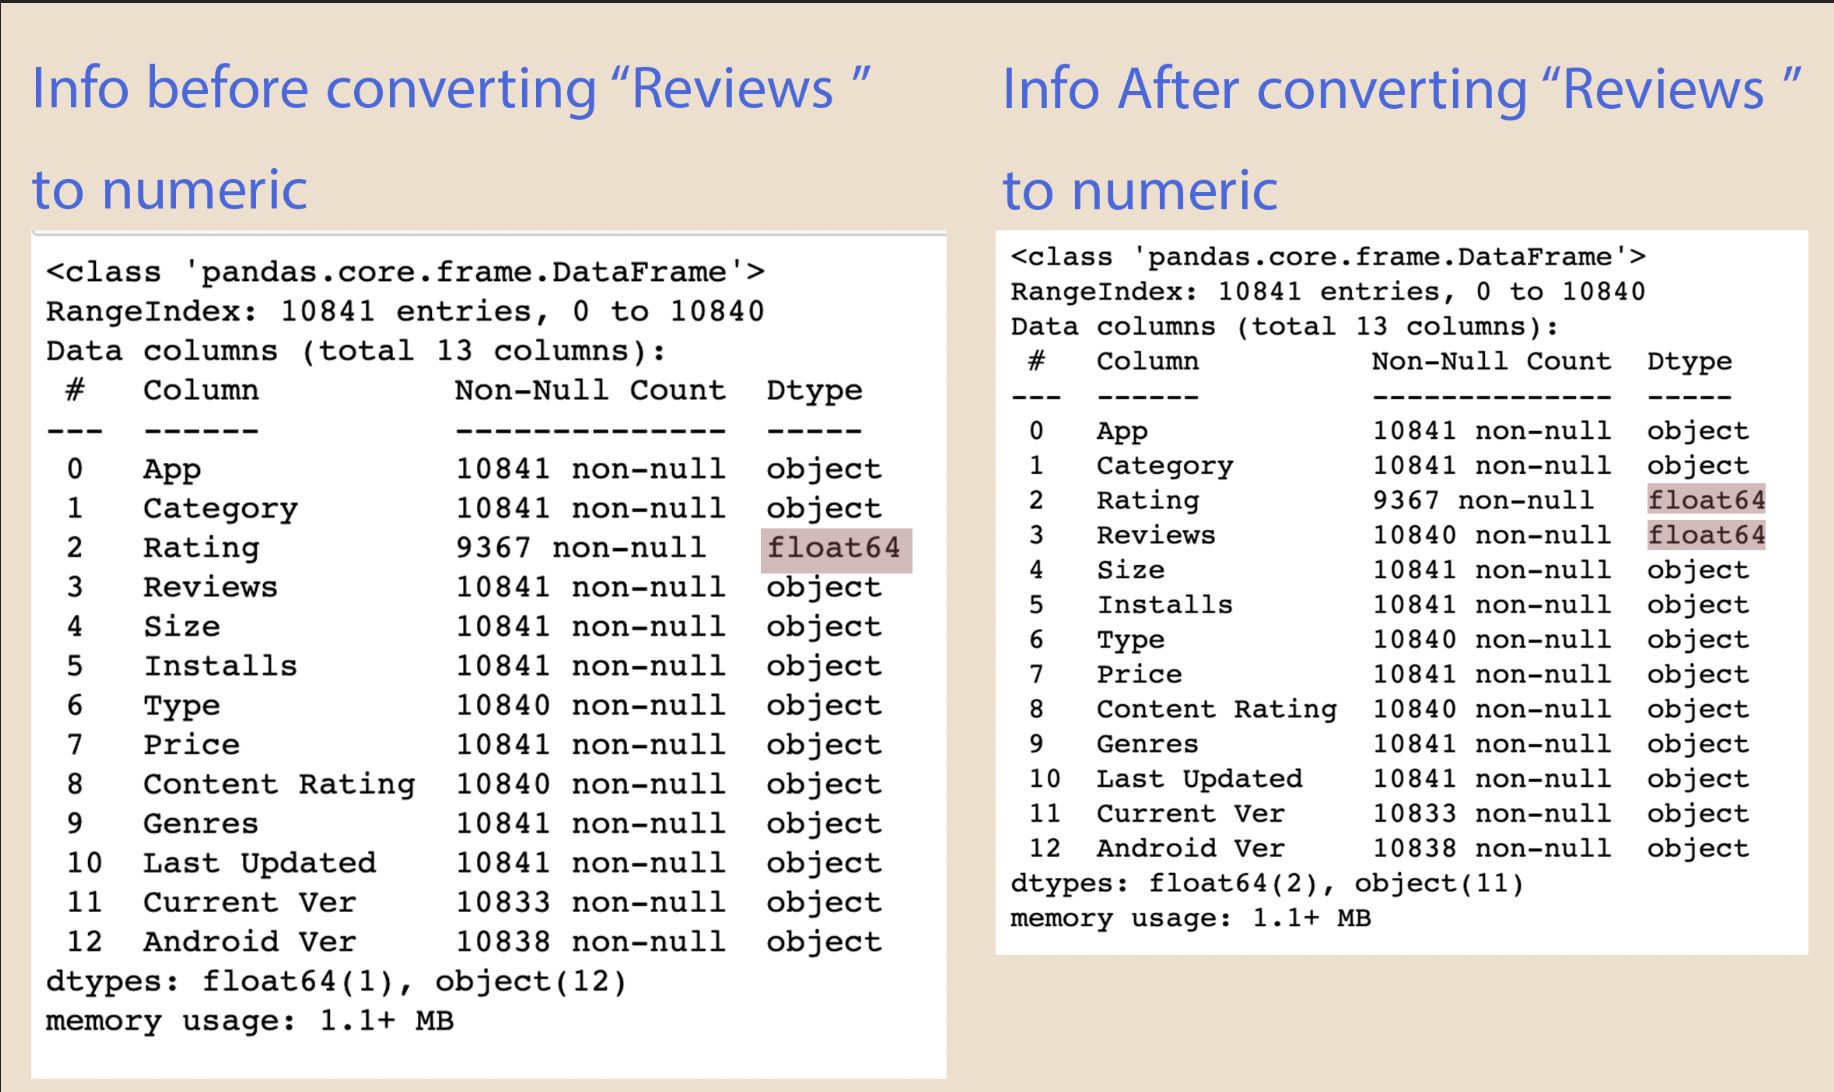

In [133]:
for Size in df['Size'].unique() :
    print(Size)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [134]:
Size = '103k'
Size.endswith('k')

True

In [135]:
Size[-4] == '0'

False

In [136]:
def fix_Size(Size) :
        if Size[-1] == 'M':
            return float(Size[:-1])
         #k
        if Size.endswith('k'):
            return float(Size[:-1]) / 1024
        
        #1000+ 
        if Size == '1000+':
            return 1.0
        #else pn.ana
        else :
            return np.nan


In [137]:
df['Size'] = df['Size'].apply(fix_Size)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


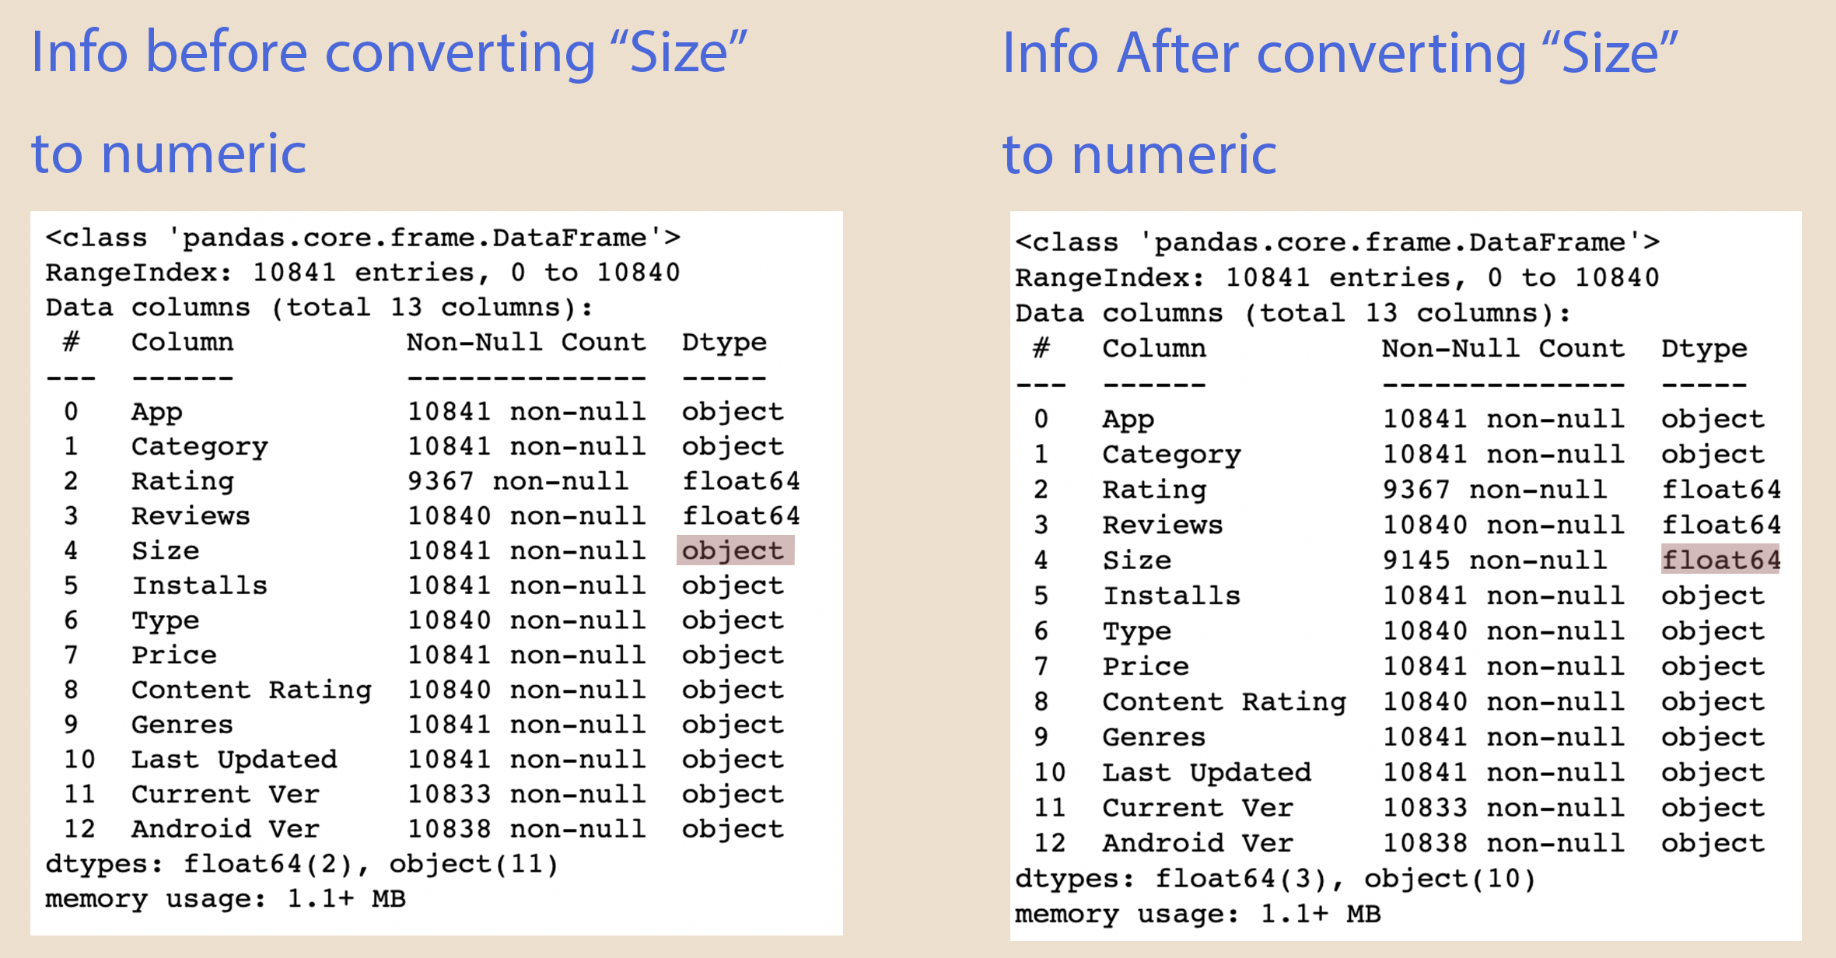

In [139]:

for Price in df['Price'] :
    print(Price)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
$4.99
$4.99
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
$4.99
$4.99
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
$3.99
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
$3.99
$6.99
$1.49
$2.99
$3.9

In [140]:
def fix_Price(p):
    if p.startswith('$'):
        return float(p[1:])
    else:
        return 0.0

In [141]:
df['Price'] = df['Price'].apply(fix_Price)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


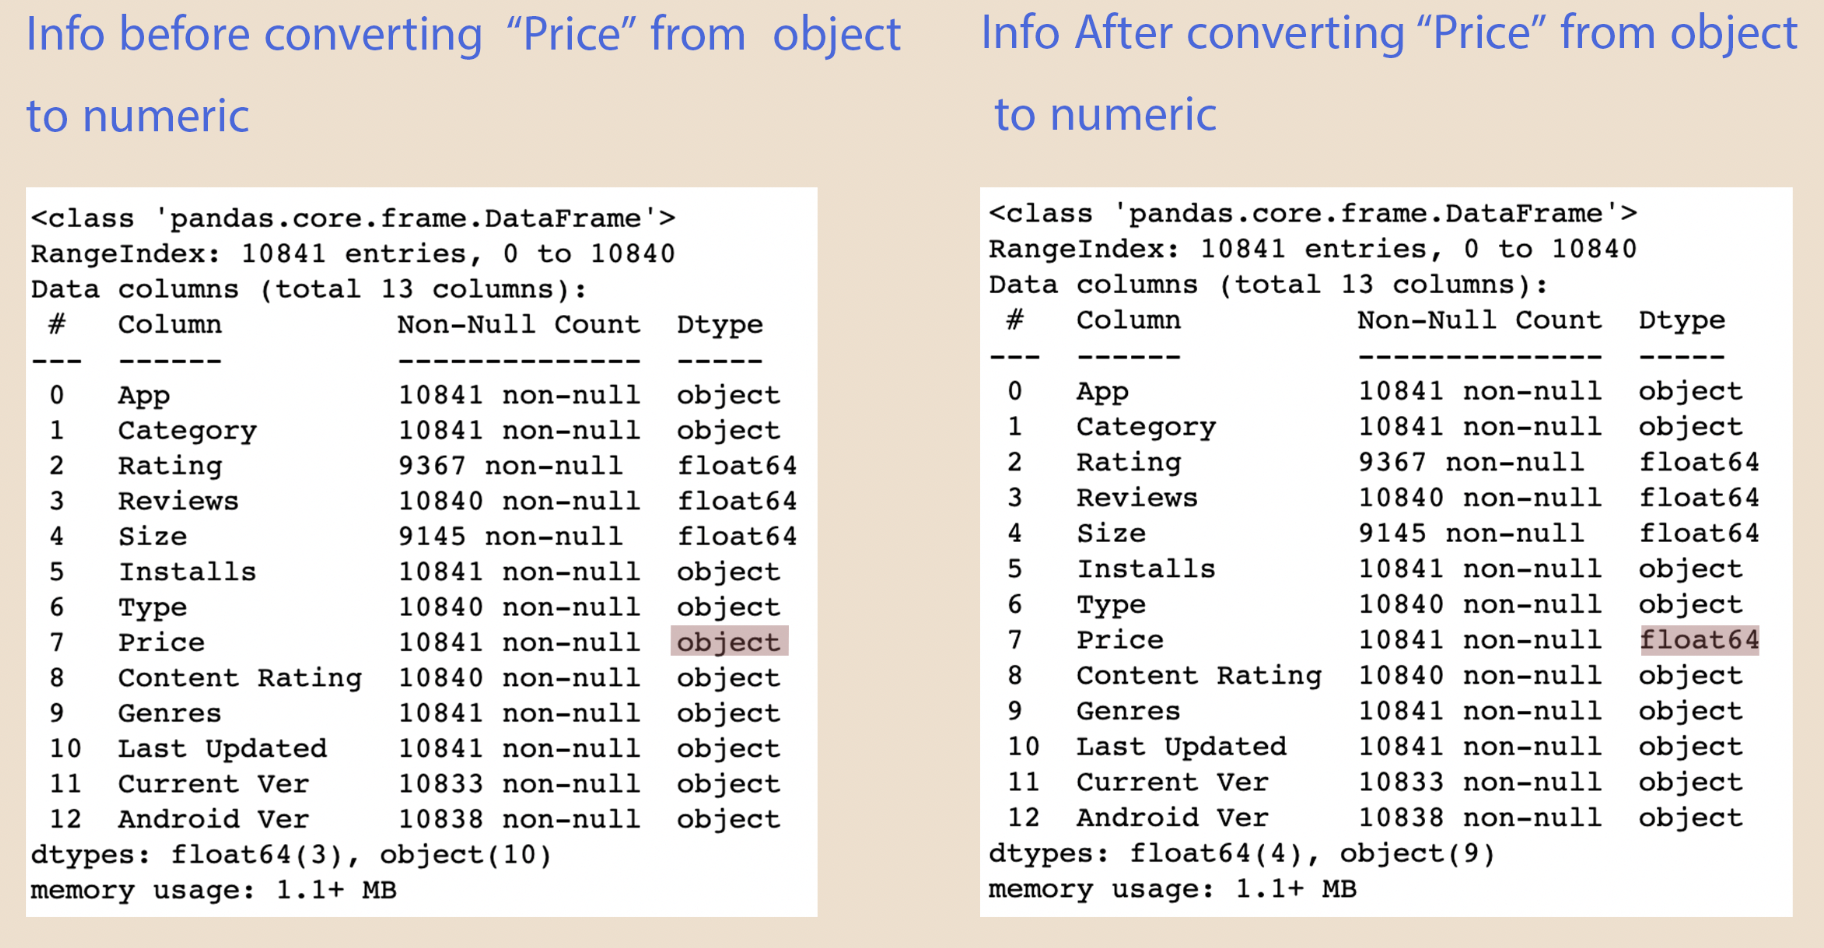

In [143]:
df.describe()

Rating       Reviews         Size         Price
count  9367.000000  1.084000e+04  9145.000000  10841.000000
mean      4.193338  4.441529e+05    21.516165      1.027273
std       0.537431  2.927761e+06    22.589084     15.948971
min       1.000000  0.000000e+00     0.008301      0.000000
25%       4.000000  3.800000e+01     4.900000      0.000000
50%       4.300000  2.094000e+03    13.000000      0.000000
75%       4.500000  5.477550e+04    30.000000      0.000000
max      19.000000  7.815831e+07   100.000000    400.000000

In [144]:
idx = df[df['Rating'] > 5].index
idx


Int64Index([10472], dtype='int64')

In [145]:
df.drop(idx ,axis=0,inplace= True)

In [146]:
df.describe()

Rating       Reviews         Size         Price
count  9366.000000  1.084000e+04  9145.000000  10840.000000
mean      4.191757  4.441529e+05    21.516165      1.027368
std       0.515219  2.927761e+06    22.589084     15.949703
min       1.000000  0.000000e+00     0.008301      0.000000
25%       4.000000  3.800000e+01     4.900000      0.000000
50%       4.300000  2.094000e+03    13.000000      0.000000
75%       4.500000  5.477550e+04    30.000000      0.000000
max       5.000000  7.815831e+07   100.000000    400.000000

In [147]:
 for Category in df['Category'].unique() :
        print(Category)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [148]:
 for Installs in df['Installs'].unique() :
    print(Installs)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


In [149]:
for Type in df['Type'].unique() :
    print(Type)
    
   

Free
Paid
nan


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [151]:
for Content_Rating in df['Content Rating'].unique() :
    print(Content_Rating)
    

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [152]:
for Android_Ver in df['Android Ver'].unique() :
    print(Android_Ver)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
nan
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


In [153]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [154]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [155]:
df.drop(['Genres', 'Last Updated', 'Current Ver'],axis= 1,inplace=True)

In [156]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews  Size     Installs  Type  Price Content Rating  \
0         4.1     159.0  19.0      10,000+  Free    0.0       Everyone   
1         3.9     967.0  14.0     500,000+  Free    0.0       Everyone   
2         4.7   87510.0   8.7   5,000,000+  Free    0.0       Everyone   
3         4.5  215644.0  25.0  50,000,000+  Free    0.0           Teen   
4         4.3     967.0   2.8     100,000+  Free    0.0       Everyone   
...       ...       ...   ...          ...   ...    ...            ...   
10836     4.5      38.0  53.0       5,000+  Free    0.0       Everyone   
10837     5.0       4.0   3.6         100+  Free    0.0       Everyone   
10838     NaN       3.0   9.5       1,000+  Free    0.0       Everyone   
10839     4.5     114.0   NaN       1,000+  Free    0.0     Mature 17+   
10840     4.5  398307.0  19.0  10,000,000+  Free    0.0       Everyone   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[10840 rows x 10 columns]

In [157]:
for AndroidVer in df['Android Ver'] :
    print(AndroidVer)

4.0.3 and up
4.0.3 and up
4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
4.0.3 and up
4.2 and up
3.0 and up
4.0.3 and up
4.1 and up
4.0 and up
4.1 and up
4.4 and up
2.3 and up
4.2 and up
4.1 and up
2.3 and up
4.0.3 and up
4.1 and up
4.1 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.1 and up
3.0 and up
4.0.3 and up
4.0.3 and up
2.3 and up
2.3 and up
4.0.3 and up
2.3 and up
4.0 and up
4.1 and up
4.1 and up
4.1 and up
4.4 and up
2.3.3 and up
4.0.3 and up
4.0 and up
4.0.3 and up
4.0.3 and up
Varies with device
4.1 and up
4.1 and up
4.1 and up
4.1 and up
4.1 and up
2.3 and up
4.0.3 and up
4.1 and up
4.1 and up
Varies with device
4.1 and up
4.1 and up
4.0 and up
4.4 and up
4.1 and up
2.2 and up
4.4 and up
4.0.3 and up
4.2 and up
4.1 and up
4.0 and up
4.2 and up
4.4 and up
2.3 and up
Varies with device
Varies with device
4.0.3 and up
4.0.3 and up
4.2 and up
5.0 and up
2.3.3 and up
4.0 and up
4.0 and up
4.1 and up
4.0 and up
4.1 and up
4.1 and up
6.0 and up
4.2 and up
5.0 and up
4.0.3 and up
4.

In [158]:
def check_ver_4 (version) :
    try :
        if version.startswith('4'):
            return 'Yes'
        else :
            return 'No'
    except :
        return np.nan 
        
        

In [159]:
df['Android whith Ver 4'] = df['Android Ver'].apply(check_ver_4)

In [160]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews  Size     Installs  Type  Price Content Rating  \
0         4.1     159.0  19.0      10,000+  Free    0.0       Everyone   
1         3.9     967.0  14.0     500,000+  Free    0.0       Everyone   
2         4.7   87510.0   8.7   5,000,000+  Free    0.0       Everyone   
3         4.5  215644.0  25.0  50,000,000+  Free    0.0           Teen   
4         4.3     967.0   2.8     100,000+  Free    0.0       Everyone   
...       ...       ...   ...          ...   ...    ...            ...   
10836     4.5      38.0  53.0       5,000+  Free    0.0       Everyone   
10837     5.0       4.0   3.6         100+  Free    0.0       Everyone   
10838     NaN       3.0   9.5       1,000+  Free    0.0       Everyone   
10839     4.5     114.0   NaN       1,000+  Free    0.0     Mature 17+   
10840     4.5  398307.0  19.0  10,000,000+  Free    0.0       Everyone   

              Android Ver Android whith Ver 4  
0            4.0.3 and up                 Yes  
1            4.0.3 and up                 Yes  
2            4.0.3 and up                 Yes  
3              4.2 and up                 Yes  
4              4.4 and up                 Yes  
...                   ...                 ...  
10836          4.1 and up                 Yes  
10837          4.1 and up                 Yes  
10838          2.2 and up                  No  
10839  Varies with device                  No  
10840  Varies with device                  No  

[10840 rows x 11 columns]

In [161]:
df.drop('Android Ver',axis= 1,inplace=True)

In [162]:
df.isna().sum()

App                       0
Category                  0
Rating                 1474
Reviews                   0
Size                   1695
Installs                  0
Type                      1
Price                     0
Content Rating            0
Android whith Ver 4       2
dtype: int64

In [163]:
df.shape[0]

10840

In [164]:
(df.isna().sum() / df.shape[0] )*100

App                     0.000000
Category                0.000000
Rating                 13.597786
Reviews                 0.000000
Size                   15.636531
Installs                0.000000
Type                    0.009225
Price                   0.000000
Content Rating          0.000000
Android whith Ver 4     0.018450
dtype: float64

In [165]:
from sklearn.impute import KNNImputer 

In [166]:
imputer = KNNImputer()  

In [167]:
df['Size'] = imputer.fit_transform(df[['Size']])
df['Rating'] = imputer.fit_transform(df[['Rating']])

In [168]:
(df.isna().sum() / df.shape[0] )*100

App                    0.000000
Category               0.000000
Rating                 0.000000
Reviews                0.000000
Size                   0.000000
Installs               0.000000
Type                   0.009225
Price                  0.000000
Content Rating         0.000000
Android whith Ver 4    0.018450
dtype: float64

In [169]:
from datasist.structdata import detect_outliers 

In [170]:
df.describe()

Rating       Reviews          Size         Price
count  10840.000000  1.084000e+04  10840.000000  10840.000000
mean       4.191757  4.441529e+05     21.516165      1.027368
std        0.478907  2.927761e+06     20.747804     15.949703
min        1.000000  0.000000e+00      0.008301      0.000000
25%        4.100000  3.800000e+01      5.900000      0.000000
50%        4.200000  2.094000e+03     18.000000      0.000000
75%        4.500000  5.477550e+04     26.000000      0.000000
max        5.000000  7.815831e+07    100.000000    400.000000

In [171]:
idx=detect_outliers(df,0,['Rating','Reviews','Size'])

In [172]:
idx

[15,
 87,
 159,
 176,
 209,
 311,
 312,
 325,
 477,
 492,
 501,
 510,
 513,
 514,
 518,
 520,
 522,
 527,
 528,
 533,
 546,
 549,
 554,
 555,
 572,
 578,
 588,
 611,
 619,
 625,
 645,
 663,
 678,
 681,
 684,
 694,
 696,
 862,
 869,
 885,
 915,
 1056,
 1057,
 1186,
 1190,
 1213,
 1217,
 1263,
 1472,
 1491,
 1528,
 1548,
 1561,
 1571,
 1576,
 1591,
 1594,
 1782,
 1784,
 2087,
 2249,
 2260,
 2264,
 2266,
 2295,
 2300,
 2317,
 2327,
 2329,
 2337,
 2351,
 2355,
 2360,
 2387,
 2403,
 2408,
 2411,
 2412,
 2428,
 2487,
 2492,
 2517,
 2521,
 2531,
 2535,
 2702,
 2824,
 3001,
 3021,
 3023,
 3034,
 3131,
 3133,
 3137,
 3139,
 3146,
 3165,
 3247,
 3250,
 3262,
 3268,
 3271,
 3273,
 3279,
 3460,
 3483,
 3698,
 3709,
 3741,
 3748,
 3891,
 3938,
 3955,
 3961,
 3962,
 3963,
 3972,
 3979,
 4006,
 4010,
 4062,
 4066,
 4078,
 4127,
 4135,
 4161,
 4164,
 4165,
 4168,
 4171,
 4181,
 4187,
 4194,
 4209,
 4210,
 4226,
 4230,
 4251,
 4253,
 4258,
 4331,
 4361,
 4373,
 4375,
 4386,
 4389,
 4392,
 4470,
 4492,


In [173]:
outliers = df.loc[idx]

In [174]:
outliers

App             Category  \
15                  Learn To Draw Kawaii Characters       ART_AND_DESIGN   
87                    RST - Sale of cars on the PCT    AUTO_AND_VEHICLES   
159                                  Cloud of Books  BOOKS_AND_REFERENCE   
176                                Free Book Reader  BOOKS_AND_REFERENCE   
209                                 Plugin:AOT v5.0             BUSINESS   
...                                             ...                  ...   
10779                         Fortune Quest: Savior               FAMILY   
10783  Modern Counter Terror Attack – Shooting Game                 GAME   
10793                                     Sid Story                 GAME   
10803                  Fatal Raid - No.1 Mobile FPS                 GAME   
10824                                     Cardio-FR              MEDICAL   

         Rating  Reviews       Size    Installs  Type  Price Content Rating  \
15     3.200000     55.0   2.700000      5,000+  Free    0.0       Everyone   
87     3.200000    250.0   1.100000    100,000+  Free    0.0       Everyone   
159    3.300000   1862.0  19.000000  1,000,000+  Free    0.0       Everyone   
176    3.400000   1680.0   4.000000    100,000+  Free    0.0       Everyone   
209    3.100000   4034.0   0.022461    100,000+  Free    0.0       Everyone   
...         ...      ...        ...         ...   ...    ...            ...   
10779  3.600000    135.0  75.000000     10,000+  Free    0.0   Everyone 10+   
10783  4.200000    340.0  72.000000     50,000+  Free    0.0     Mature 17+   
10793  4.400000  28510.0  78.000000    500,000+  Free    0.0           Teen   
10803  4.300000  56496.0  81.000000  1,000,000+  Free    0.0           Teen   
10824  4.191757     67.0  82.000000     10,000+  Free    0.0       Everyone   

      Android whith Ver 4  
15                    Yes  
87                    Yes  
159                   Yes  
176                   Yes  
209                    No  
...                   ...  
10779                 Yes  
10783                 Yes  
10793                 Yes  
10803                 Yes  
10824                 Yes  

[3157 rows x 10 columns]

In [175]:
cleandf = df.drop(idx ,axis=0)

In [176]:
cleandf 

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10835                                           FR Forms             BUSINESS   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

         Rating  Reviews       Size    Installs  Type  Price Content Rating  \
0      4.100000    159.0  19.000000     10,000+  Free    0.0       Everyone   
1      3.900000    967.0  14.000000    500,000+  Free    0.0       Everyone   
2      4.700000  87510.0   8.700000  5,000,000+  Free    0.0       Everyone   
4      4.300000    967.0   2.800000    100,000+  Free    0.0       Everyone   
5      4.400000    167.0   5.600000     50,000+  Free    0.0       Everyone   
...         ...      ...        ...         ...   ...    ...            ...   
10835  4.191757      0.0   9.600000         10+  Free    0.0       Everyone   
10836  4.500000     38.0  53.000000      5,000+  Free    0.0       Everyone   
10837  5.000000      4.0   3.600000        100+  Free    0.0       Everyone   
10838  4.191757      3.0   9.500000      1,000+  Free    0.0       Everyone   
10839  4.500000    114.0  21.516165      1,000+  Free    0.0     Mature 17+   

      Android whith Ver 4  
0                     Yes  
1                     Yes  
2                     Yes  
4                     Yes  
5                      No  
...                   ...  
10835                 Yes  
10836                 Yes  
10837                 Yes  
10838                  No  
10839                  No  

[7683 rows x 10 columns]

# What is the most expensive app on the store.

In [177]:
df[ df['Price'] == df['Price'].max() ]

App   Category  Rating  Reviews  Size Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6    275.0   7.3  10,000+   

      Type  Price Content Rating Android whith Ver 4  
4367  Paid  400.0       Everyone                 Yes

# Which Genre has more apps.

In [178]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# What is the average size of the free apps & paid apps.


In [179]:
df.groupby('Type').mean()['Size']

Type
Free    21.675521
Paid    19.516453
Name: Size, dtype: float64

# What is the 5 top expenisev apps that hsa rated 5 .


In [180]:
df[df['Rating'] == 5].sort_values(by='Price' , ascending= False ).head()

App Category  Rating  Reviews  \
5489                  AP Art History Flashcards   FAMILY     5.0      1.0   
7477                 USMLE Step 2 CK Flashcards   FAMILY     5.0      1.0   
5246                      Hey AJ! It's Bedtime!   FAMILY     5.0      1.0   
7204  TI-84 CE Graphing Calculator Manual TI 84   FAMILY     5.0      1.0   
5482                 meStudying: AP English Lit   FAMILY     5.0      1.0   

           Size Installs  Type  Price Content Rating Android whith Ver 4  
5489  96.000000      10+  Paid  29.99     Mature 17+                 Yes  
7477  40.000000      10+  Paid  19.99       Everyone                  No  
5246  63.000000      10+  Paid   4.99       Everyone                  No  
7204  27.000000     100+  Paid   4.99       Everyone                 Yes  
5482   0.639648      10+  Paid   4.99       Everyone                  No

# How many apps that has more than 50K reviews.


In [181]:
df[ df['Reviews'] > 50000 ].sort_values('Reviews')

App       Category  \
3043                  DraftKings - Daily Fantasy Sports         SPORTS   
9677  Masha and The Bear Jam Day Match 3 games for kids         FAMILY   
8294                         Bokeh (Background defocus)    PHOTOGRAPHY   
3098                                   Fantasy Football         SPORTS   
3046                                   Fantasy Football         SPORTS   
...                                                 ...            ...   
3904                                 WhatsApp Messenger  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
3943                                           Facebook         SOCIAL   
2544                                           Facebook         SOCIAL   

      Rating     Reviews       Size        Installs  Type  Price  \
3043     4.5     50017.0  41.000000      1,000,000+  Free    0.0   
9677     4.6     50060.0  98.000000      1,000,000+  Free    0.0   
8294     4.0     50109.0  21.516165     10,000,000+  Free    0.0   
3098     3.5     50179.0  23.000000      1,000,000+  Free    0.0   
3046     3.5     50179.0  23.000000      1,000,000+  Free    0.0   
...      ...         ...        ...             ...   ...    ...   
3904     4.4  69109672.0  21.516165  1,000,000,000+  Free    0.0   
336      4.4  69119316.0  21.516165  1,000,000,000+  Free    0.0   
381      4.4  69119316.0  21.516165  1,000,000,000+  Free    0.0   
3943     4.1  78128208.0  21.516165  1,000,000,000+  Free    0.0   
2544     4.1  78158306.0  21.516165  1,000,000,000+  Free    0.0   

       Content Rating Android whith Ver 4  
3043  Adults only 18+                 Yes  
9677         Everyone                 Yes  
8294         Everyone                  No  
3098         Everyone                  No  
3046         Everyone                  No  
...               ...                 ...  
3904         Everyone                  No  
336          Everyone                  No  
381          Everyone                  No  
3943             Teen                  No  
2544             Teen                  No  

[2782 rows x 10 columns]

# What is the average price of the apps for each genre with each installs numbers.


In [182]:
pd.pivot_table(index='Category',columns='Installs',values='Price',data = df , aggfunc=np.mean)

Installs               0       0+          1+     1,000+  1,000,000+  \
Category                                                               
ART_AND_DESIGN       NaN    0.000         NaN   0.663333    0.000000   
AUTO_AND_VEHICLES    NaN      NaN    0.000000   0.000000    0.000000   
BEAUTY               NaN      NaN         NaN   0.000000    0.000000   
BOOKS_AND_REFERENCE  NaN      NaN    5.990000   0.149118    0.000000   
BUSINESS             NaN    0.000    0.000000   0.183265    0.000000   
COMICS               NaN      NaN         NaN   0.000000    0.000000   
COMMUNICATION        NaN      NaN    0.000000   0.294091    0.066444   
DATING               NaN      NaN    0.000000   0.411176    0.000000   
EDUCATION            NaN      NaN         NaN   4.990000    0.000000   
ENTERTAINMENT        NaN      NaN         NaN        NaN    0.000000   
EVENTS               NaN      NaN  109.990000   0.000000    0.000000   
FAMILY               0.0    2.490    0.846000   0.511674    0.036182   
FINANCE              NaN  212.990    8.745000  30.148750    0.000000   
FOOD_AND_DRINK       NaN      NaN    0.000000   0.000000    0.000000   
GAME                 NaN      NaN    1.090000   0.812250    0.120000   
HEALTH_AND_FITNESS   NaN      NaN    0.000000   0.950476    0.000000   
HOUSE_AND_HOME       NaN      NaN    0.000000   0.000000    0.000000   
LIBRARIES_AND_DEMO   NaN      NaN         NaN   0.000000    0.000000   
LIFESTYLE            NaN  399.990    0.000000   9.726364    0.130217   
MAPS_AND_NAVIGATION  NaN      NaN         NaN   0.066000    0.000000   
MEDICAL              NaN  200.000    1.138571   8.277308    0.000000   
NEWS_AND_MAGAZINES   NaN    0.000         NaN   0.000000    0.000000   
PARENTING            NaN      NaN         NaN   0.000000    0.000000   
PERSONALIZATION      NaN    1.490    0.708571   0.709048    0.148085   
PHOTOGRAPHY          NaN      NaN         NaN   1.831667    0.332778   
PRODUCTIVITY         NaN  154.990    0.000000   0.744000    0.000000   
SHOPPING             NaN      NaN         NaN   0.000000    0.000000   
SOCIAL               NaN    6.995    0.000000   0.043043    0.000000   
SPORTS               NaN      NaN    0.000000   0.950909    0.037547   
TOOLS                NaN      NaN    0.298000   0.589878    0.029604   
TRAVEL_AND_LOCAL     NaN    3.990    0.000000   0.566957    0.000000   
VIDEO_PLAYERS        NaN      NaN         NaN   0.110000    0.000000   
WEATHER              NaN      NaN         NaN   1.747500    0.000000   

Installs             1,000,000,000+       10+    10,000+  10,000,000+  \
Category                                                                
ART_AND_DESIGN                  NaN       NaN   0.180909     0.000000   
AUTO_AND_VEHICLES               NaN  0.000000   0.000000     0.000000   
BEAUTY                          NaN       NaN   0.000000     0.000000   
BOOKS_AND_REFERENCE             0.0  3.996842   0.179600     0.000000   
BUSINESS                        NaN  2.201905   0.065000     0.000000   
COMICS                          NaN       NaN   0.000000     0.000000   
COMMUNICATION                   0.0  1.392105   0.478400     0.000000   
DATING                          NaN  0.000000   0.295556     0.000000   
EDUCATION                       NaN       NaN   0.000000     0.000000   
ENTERTAINMENT                   0.0       NaN   0.000000     0.000000   
EVENTS                          NaN  0.000000   0.000000          NaN   
FAMILY                          0.0  2.210656   4.058182     0.078539   
FINANCE                         NaN  0.000000   0.318551     0.000000   
FOOD_AND_DRINK                  NaN  0.000000   0.387778     0.000000   
GAME                            0.0  0.066000   1.185625     0.004400   
HEALTH_AND_FITNESS              NaN  0.066000   0.645882     0.000000   
HOUSE_AND_HOME                  NaN  0.000000   0.000000     0.000000   
LIBRARIES_AND_DEMO              NaN  0.000000   0.000000     0.000000   
LIFESTYLE          

# How many apps have rating > 4.7 and what is thier avg price.


In [183]:
df[df['Rating'] > 4.7 ]['Price'].mean()

0.5018487394957988

# How much google earned from the 5,000,000+ installed apps


In [184]:
df.groupby('Installs').sum()['Price']

Installs
0                    0.00
0+                1205.41
1+                 179.29
1,000+            2662.56
1,000,000+          68.76
1,000,000,000+       0.00
10+                447.76
10,000+           2462.80
10,000,000+         14.97
100+               837.76
100,000+           861.45
100,000,000+         0.00
5+                  71.38
5,000+            1437.96
5,000,000+           0.00
50+                109.72
50,000+            603.85
50,000,000+          0.00
500+               134.62
500,000+            38.38
500,000,000+         0.00
Name: Price, dtype: float64

 # What is the max and min size for free and paid apps.


In [185]:
 df.groupby('Type').describe()['Size']

count       mean        std       min  25%   50%   75%    max
Type                                                                 
Free  10039.0  21.675521  20.715132  0.008301  6.1  19.0  26.0  100.0
Paid    800.0  19.516453  21.077113  0.013672  3.4  13.0  25.0  100.0

# is there a correlation between rating, Reviews, Size with the price of the app

In [186]:
df.corr()

Rating   Reviews      Size     Price
Rating   1.000000  0.068018  0.074864 -0.020190
Reviews  0.068018  1.000000  0.128255 -0.009667
Size     0.074864  0.128255  1.000000 -0.022995
Price   -0.020190 -0.009667 -0.022995  1.000000

In [187]:
df.corr()['Price']

Rating    -0.020190
Reviews   -0.009667
Size      -0.022995
Price      1.000000
Name: Price, dtype: float64

# How many apps for each type for each content reading.


In [190]:
pd.pivot_table(index='Type',columns='Content Rating',values='Rating',data = df , aggfunc='count')

Content Rating  Adults only 18+  Everyone  Everyone 10+  Mature 17+    Teen  \
Type                                                                          
Free                        3.0    8019.0         380.0       479.0  1156.0   
Paid                        NaN     695.0          33.0        20.0    52.0   

Content Rating  Unrated  
Type                     
Free                2.0  
Paid                NaN

#  How many apps that can work on android version 4.2

In [191]:
df['Android whith Ver 4' ].value_counts()

Yes    6959
No     3879
Name: Android whith Ver 4, dtype: int64